<a href="https://colab.research.google.com/github/ovieimara/MATPMDA/blob/master/MATPMDA_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resting heart rate can be defined as the number of times the heart beats in one minute while at rest.

It may be used to indicate one's basic fitness level. Typically, if the resting heart rate goes down over time, that may reflect the effectiveness of steady aerobic exercise.

Heart rate can be affected by various factors such as temperature, body position, activities, emotions, and time of day.

For overall cardiovascular health in adults, the world health organisation recommends at least 150 minutes per week of moderate aerobic activity or 75 minutes per week of vigorous aerobic activity. Aerobic excercise includes activities that increase your breathing and heart rate such as walking, jogging, cycling and swimming.

One way to monitor the intensity of your activity is to check your heart rate against the estimated maximum heart rate for your age. During moderate intense activity, your heart rate beats about 50-69% of the maximum rate. During vigorous intense activity, the heartbeat can go up to 70-90% of your maximum heart rate

In this context my activity is walking, and I aminvestigating e trying to investigate the amount of activity suitable to maintain a healthy heart rate as recommended by world health organisation.
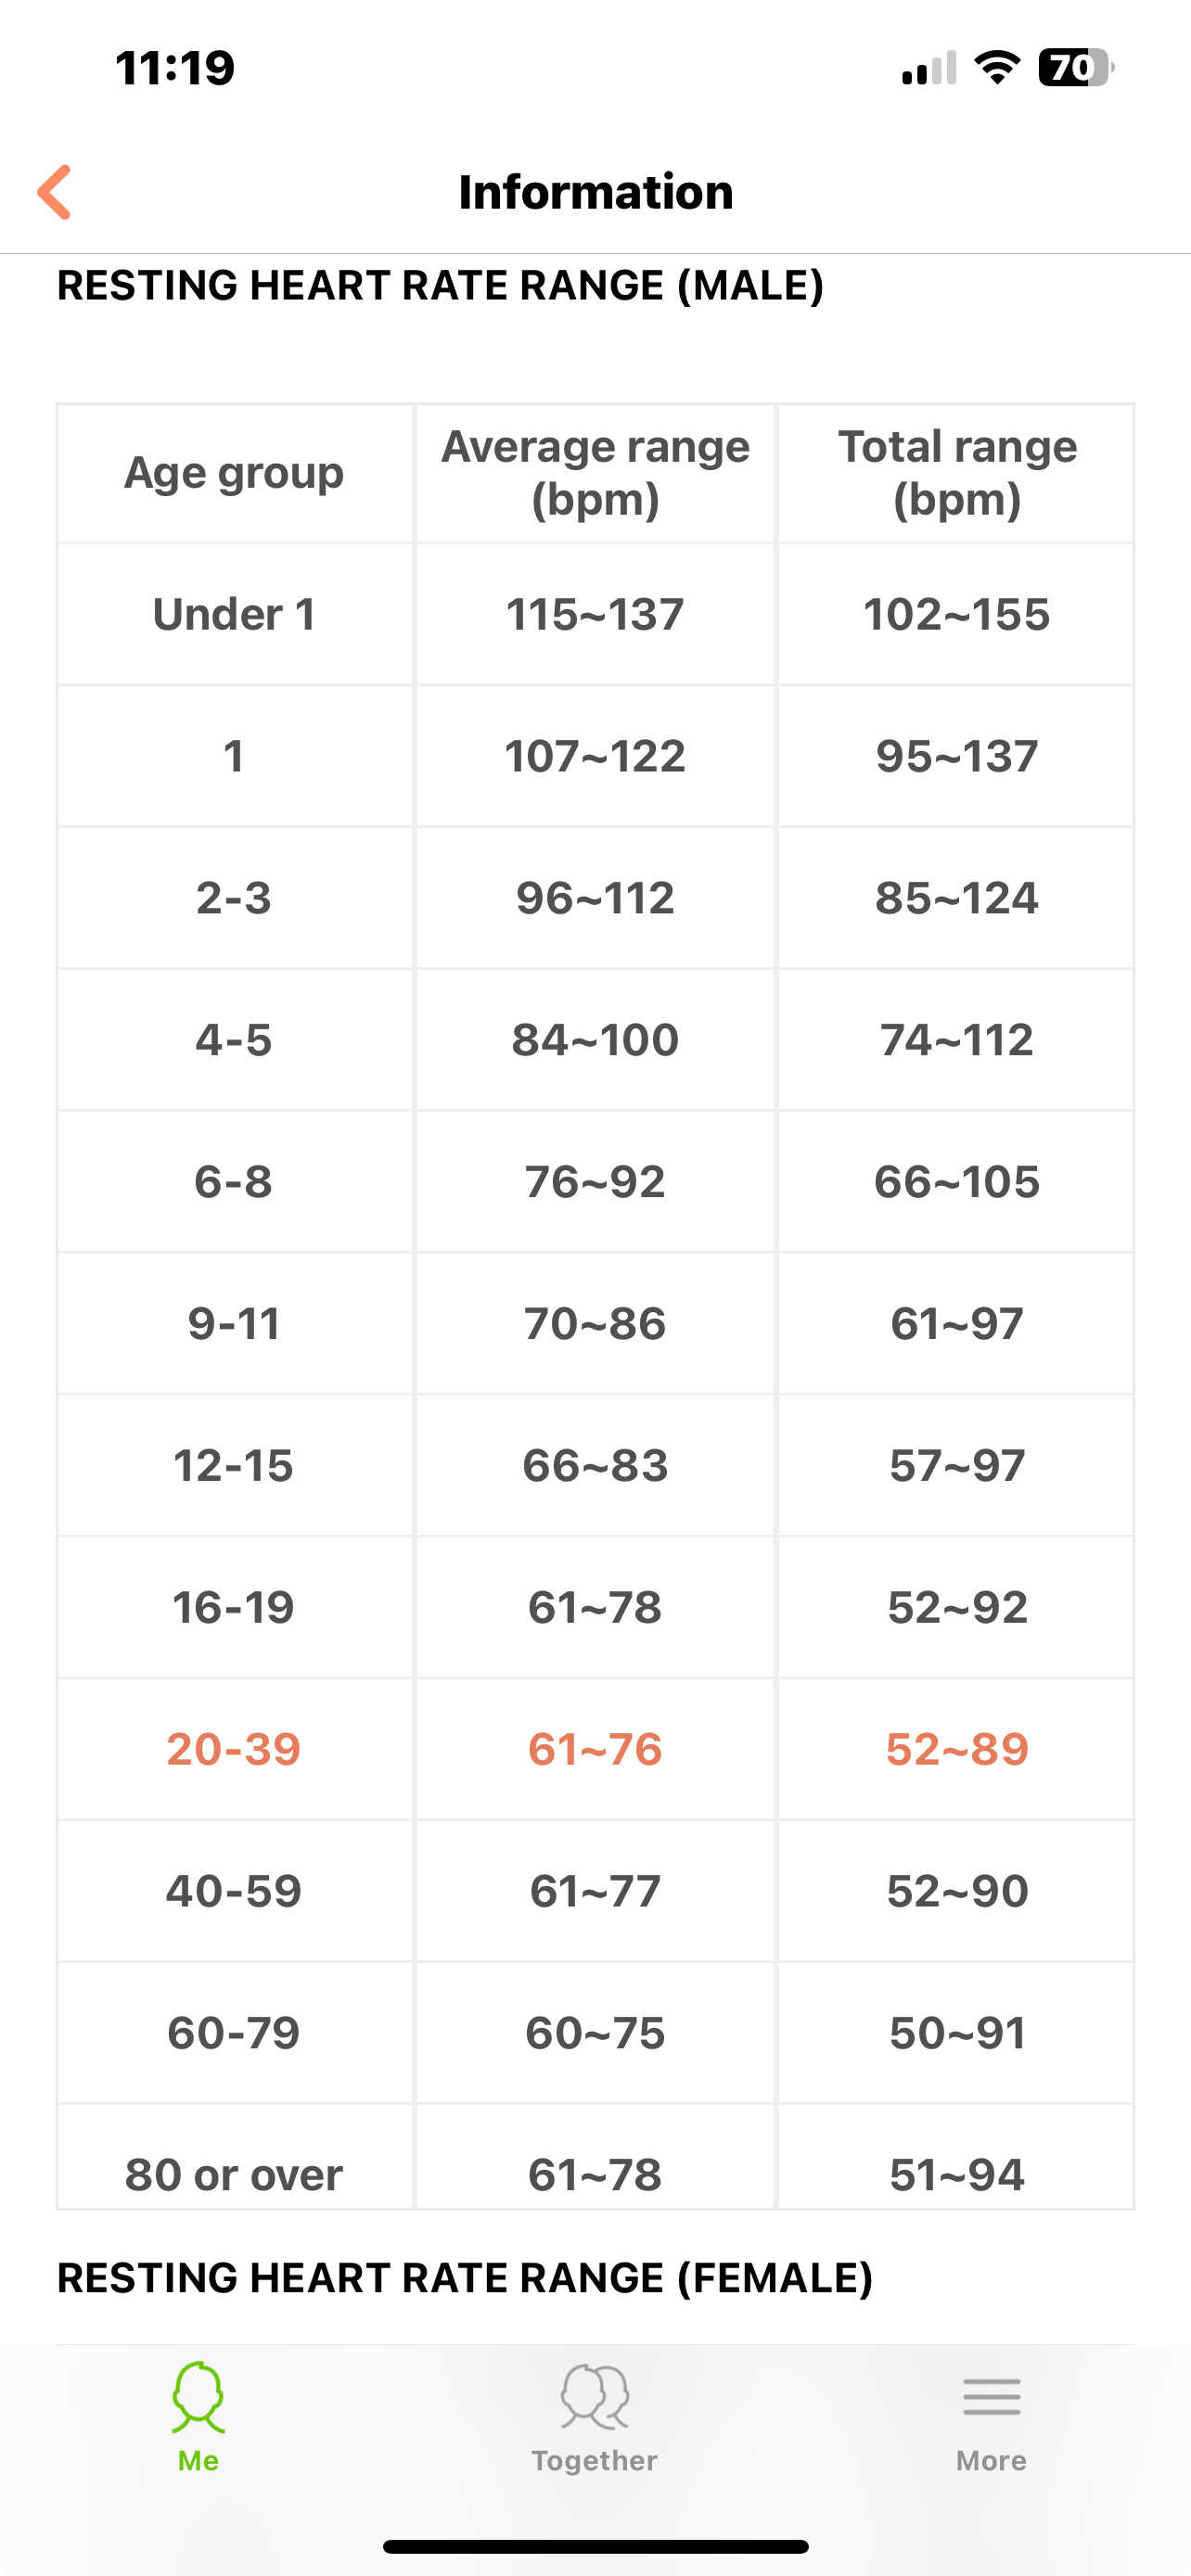

In [211]:
library(readr) # Load readr
file_path = "/content/fitness_activity_stats.csv"
cols_to_read <- c("Duration", "Distance", "Calories", "Steps", "LongestActiveTime", "AvgBpm", "Fit")

data <- read_csv(file = file_path, col_select = all_of(cols_to_read), col_types = cols(
  Duration = col_double(),
  Distance = col_double(),
  Calories = col_double(),
  Steps = col_double(),
  LongestActiveTime = col_double(),
  AvgBpm = col_double(),
  Fit = col_character()
))
# spec(data)


In [212]:
head(data)

Duration,Distance,Calories,Steps,LongestActiveTime,AvgBpm,Fit
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
216,16.53,884,23376,89,110,NO
213,13.32,697,21593,186,110,NO
126,7.59,387,12599,117,85,NO
23,8.33,437,13374,116,89,NO
43,2.70,144,3992,60,73,YES
126,7.57,388,12545,118,77,YES


In [5]:
summary(data)

    Duration         Distance         Calories         AvgBpm      
 Min.   :  3.00   Min.   : 0.190   Min.   : 14.0   Min.   :  0.00  
 1st Qu.: 16.75   1st Qu.: 2.035   1st Qu.:104.2   1st Qu.: 74.00  
 Median : 91.00   Median : 6.340   Median :328.5   Median : 77.50  
 Mean   : 90.28   Mean   : 6.105   Mean   :319.0   Mean   : 77.03  
 3rd Qu.:135.50   3rd Qu.: 8.760   3rd Qu.:444.2   3rd Qu.: 82.25  
 Max.   :231.00   Max.   :16.530   Max.   :884.0   Max.   :110.00  
     Fit           
 Length:32         
 Class :character  
 Mode  :character  
                   
                   
                   

In [213]:
features <- colnames(data)
sub_data <- data[, c("Duration", "Distance", "Calories", "Steps", "LongestActiveTime", "AvgBpm")]

sub_features = features[1:5]
size = length(sub_features)

print(sub_features)

[1] "Duration"          "Distance"          "Calories"         
[4] "Steps"             "LongestActiveTime"


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


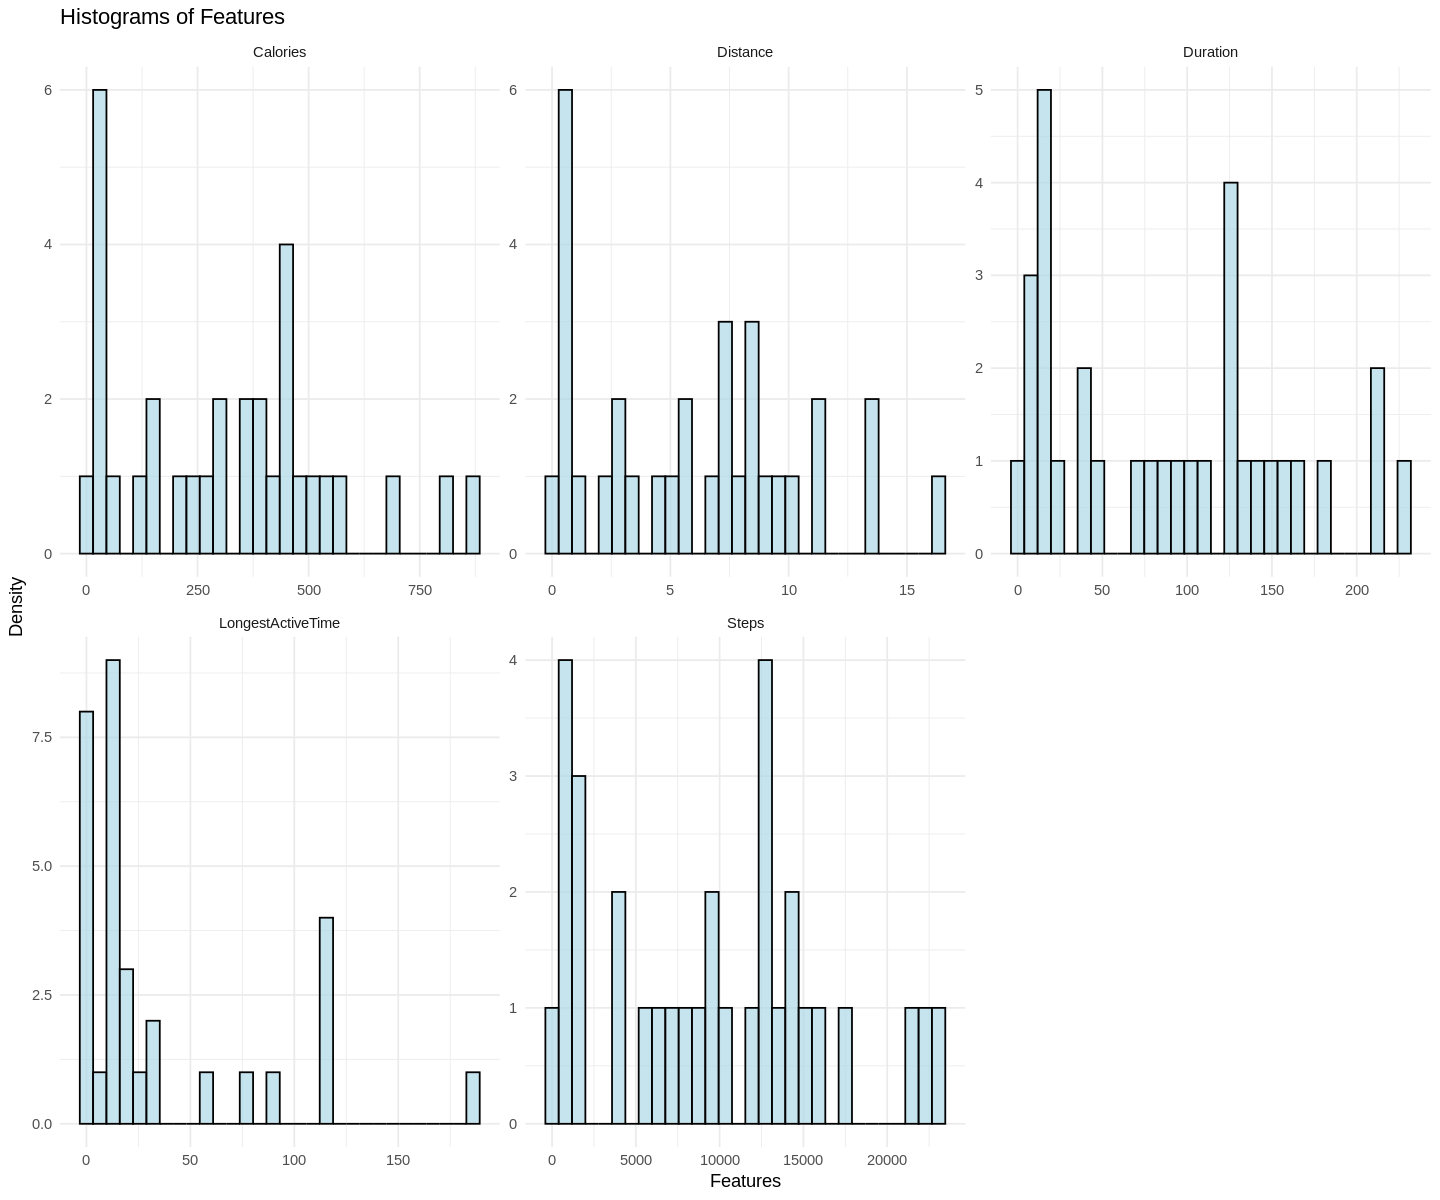

In [286]:
# Reshape data to long format
# data_long <- pivot_longer(data, cols = everything())
options(repr.plot.width = 12, repr.plot.height = 10)

features <- gather(sub_data, key = "variable", value = "value", -AvgBpm)


# Create the plot
ggplot(features, aes(x = value)) +
  geom_histogram(fill = "lightblue", color = "black", alpha = 0.7) +
  facet_wrap(~ variable, scales = "free") +

  theme_minimal() +
  labs(x = "Features", y = "Density", title = "Histograms of Features")


# for (i in 1:size) {
#   hist(sub_data[[sub_features[i]]], probability = TRUE, nclass = 14, main = paste("Histogram of", sub_features[i]),
#            xlab = sub_features[i])
# }

In [ ]:


for (i in 1:(size-1)) {
  for (j in (i + 1):size) {
    plot(sub_data[[sub_features[i]]], sub_data[[sub_features[j]]], xlab = sub_features[i], ylab = sub_features[j])
  }
}


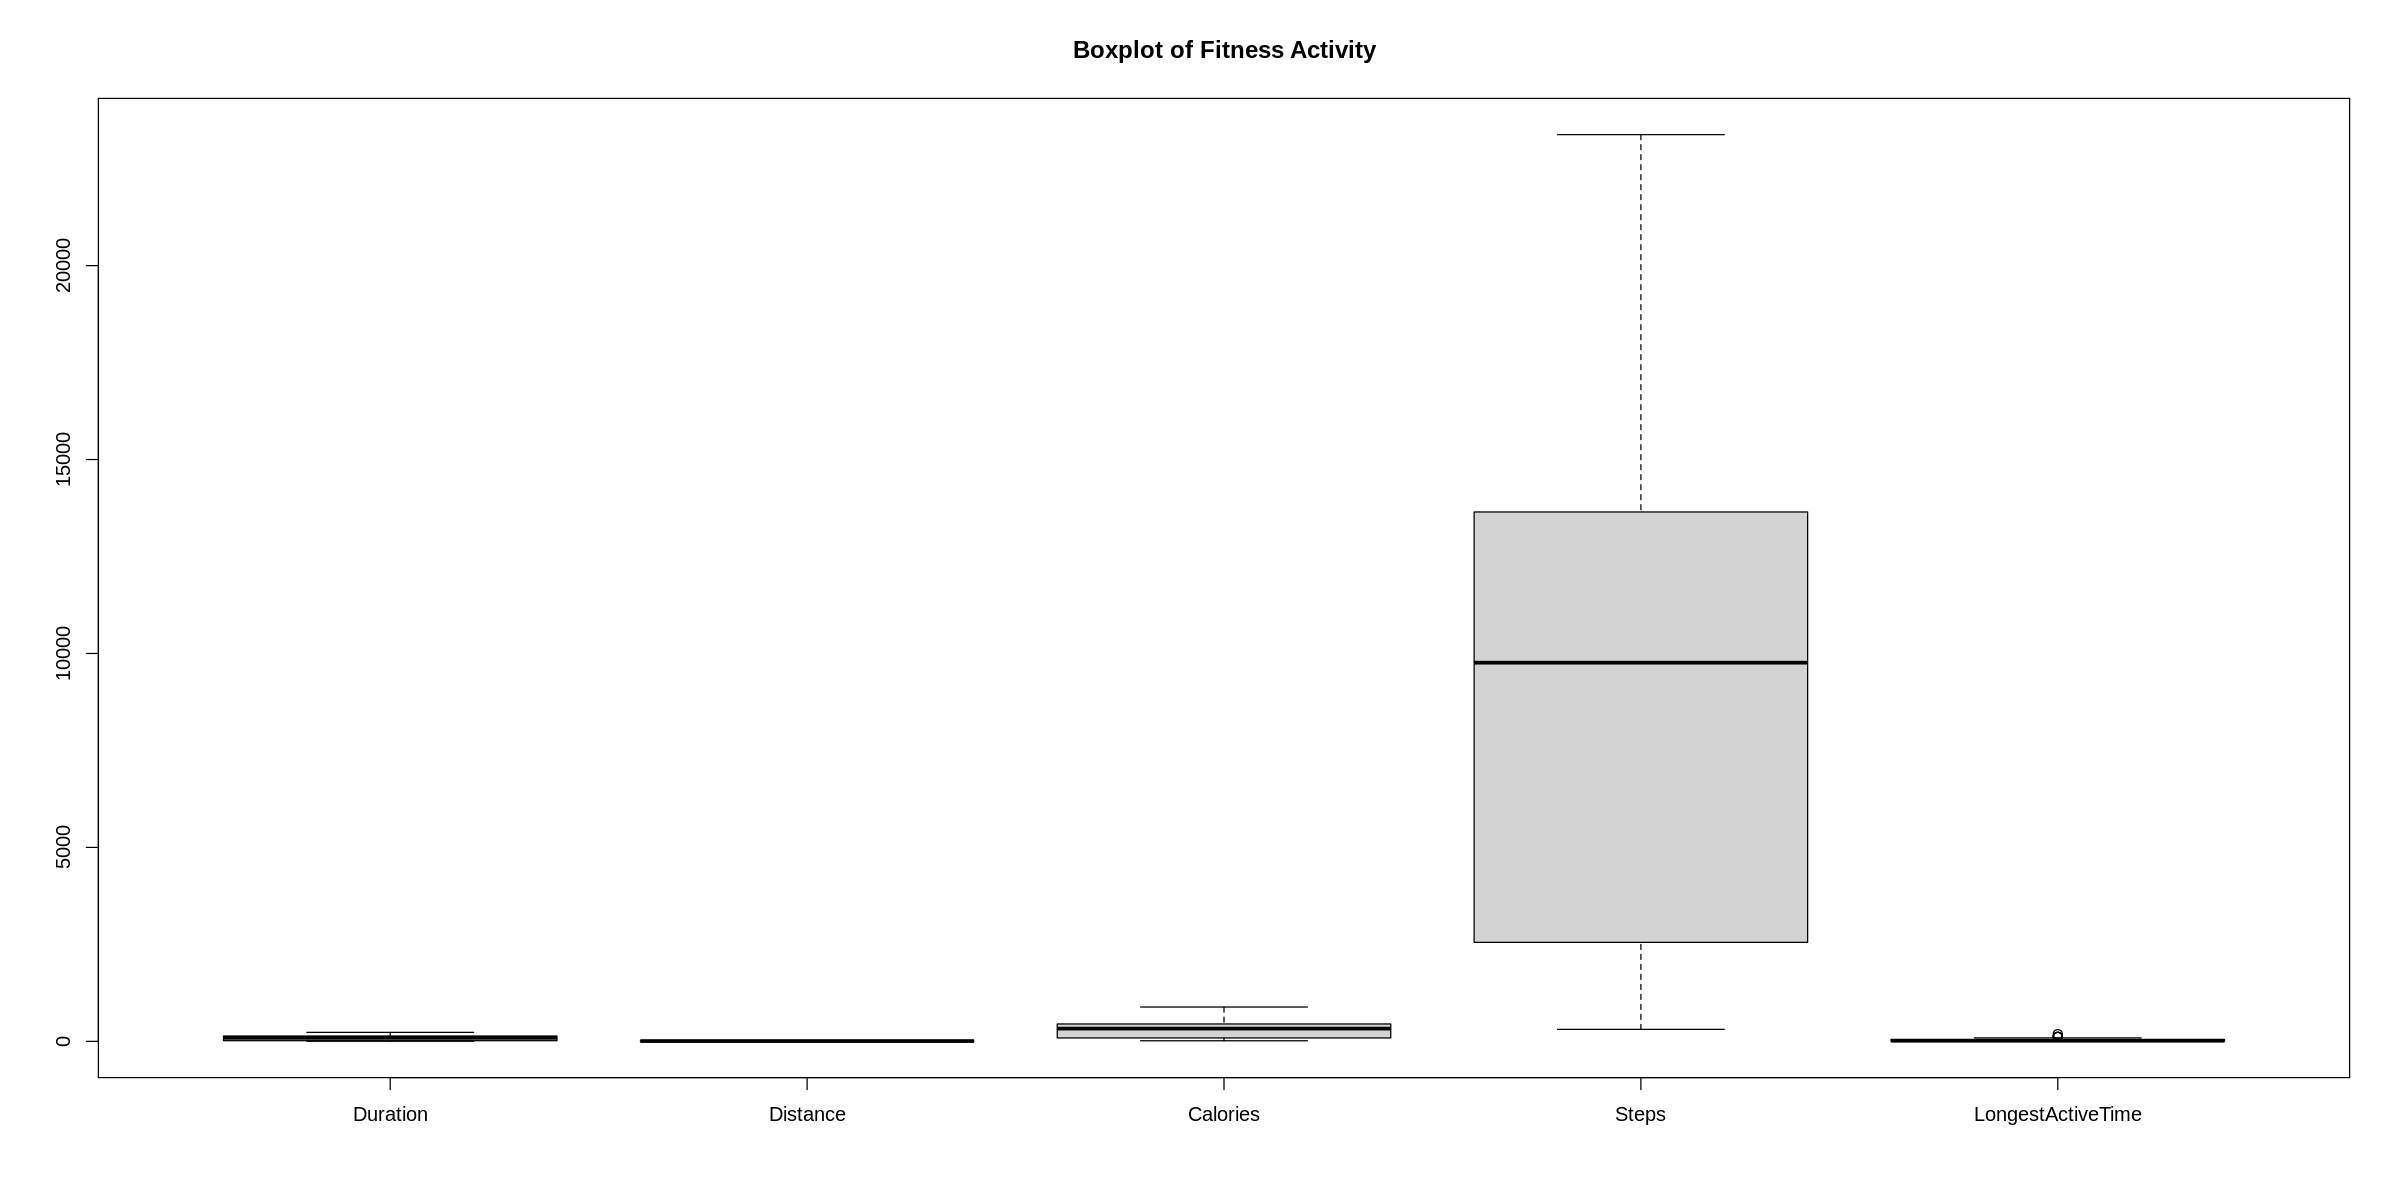

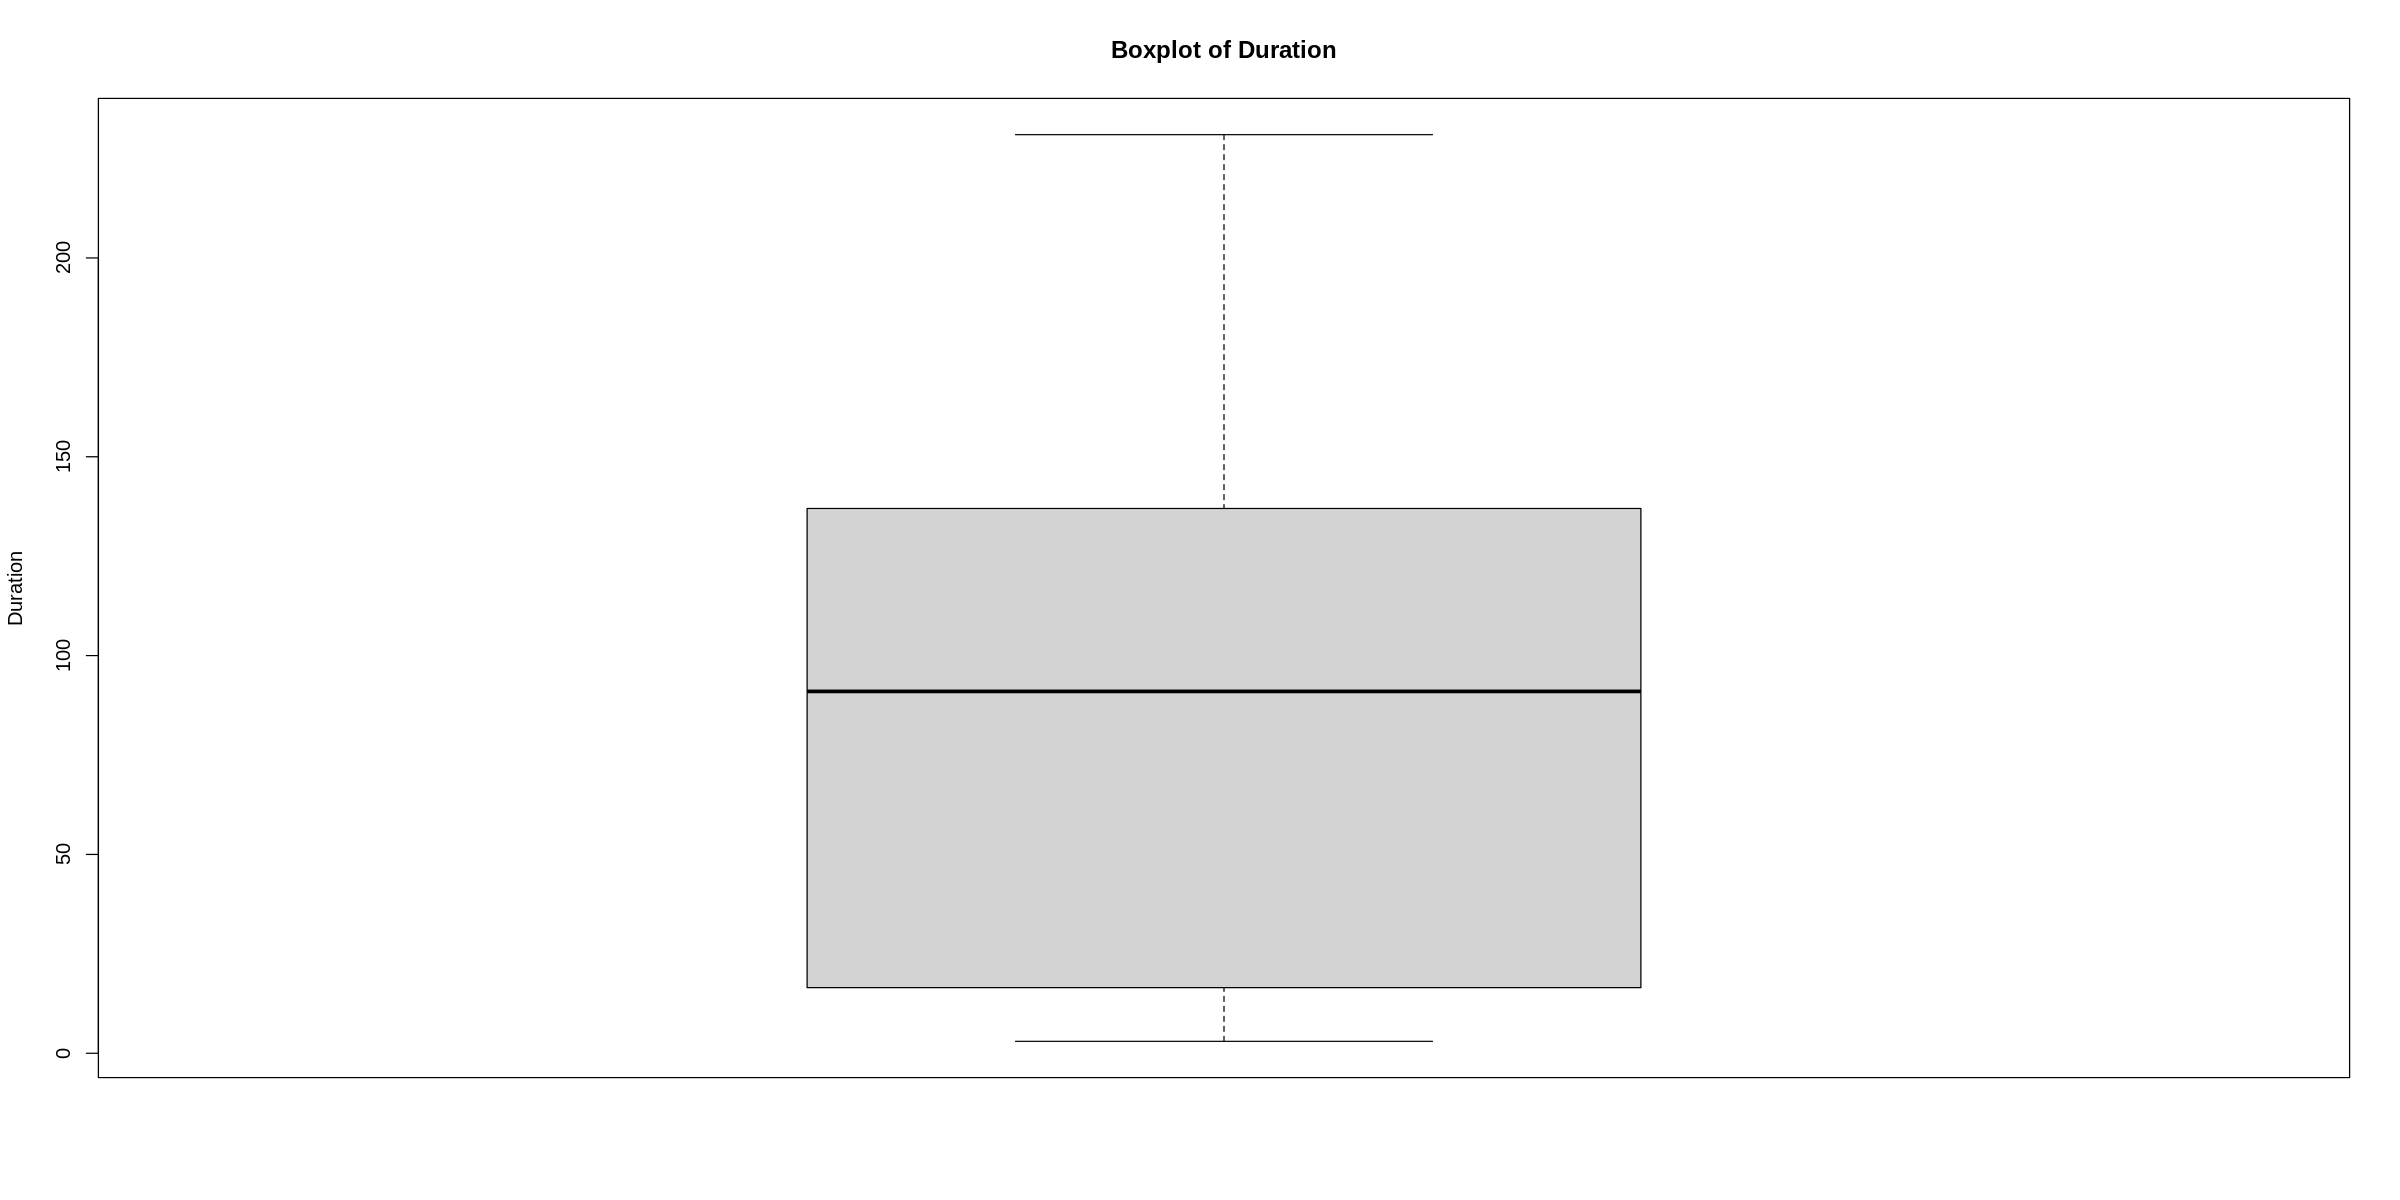

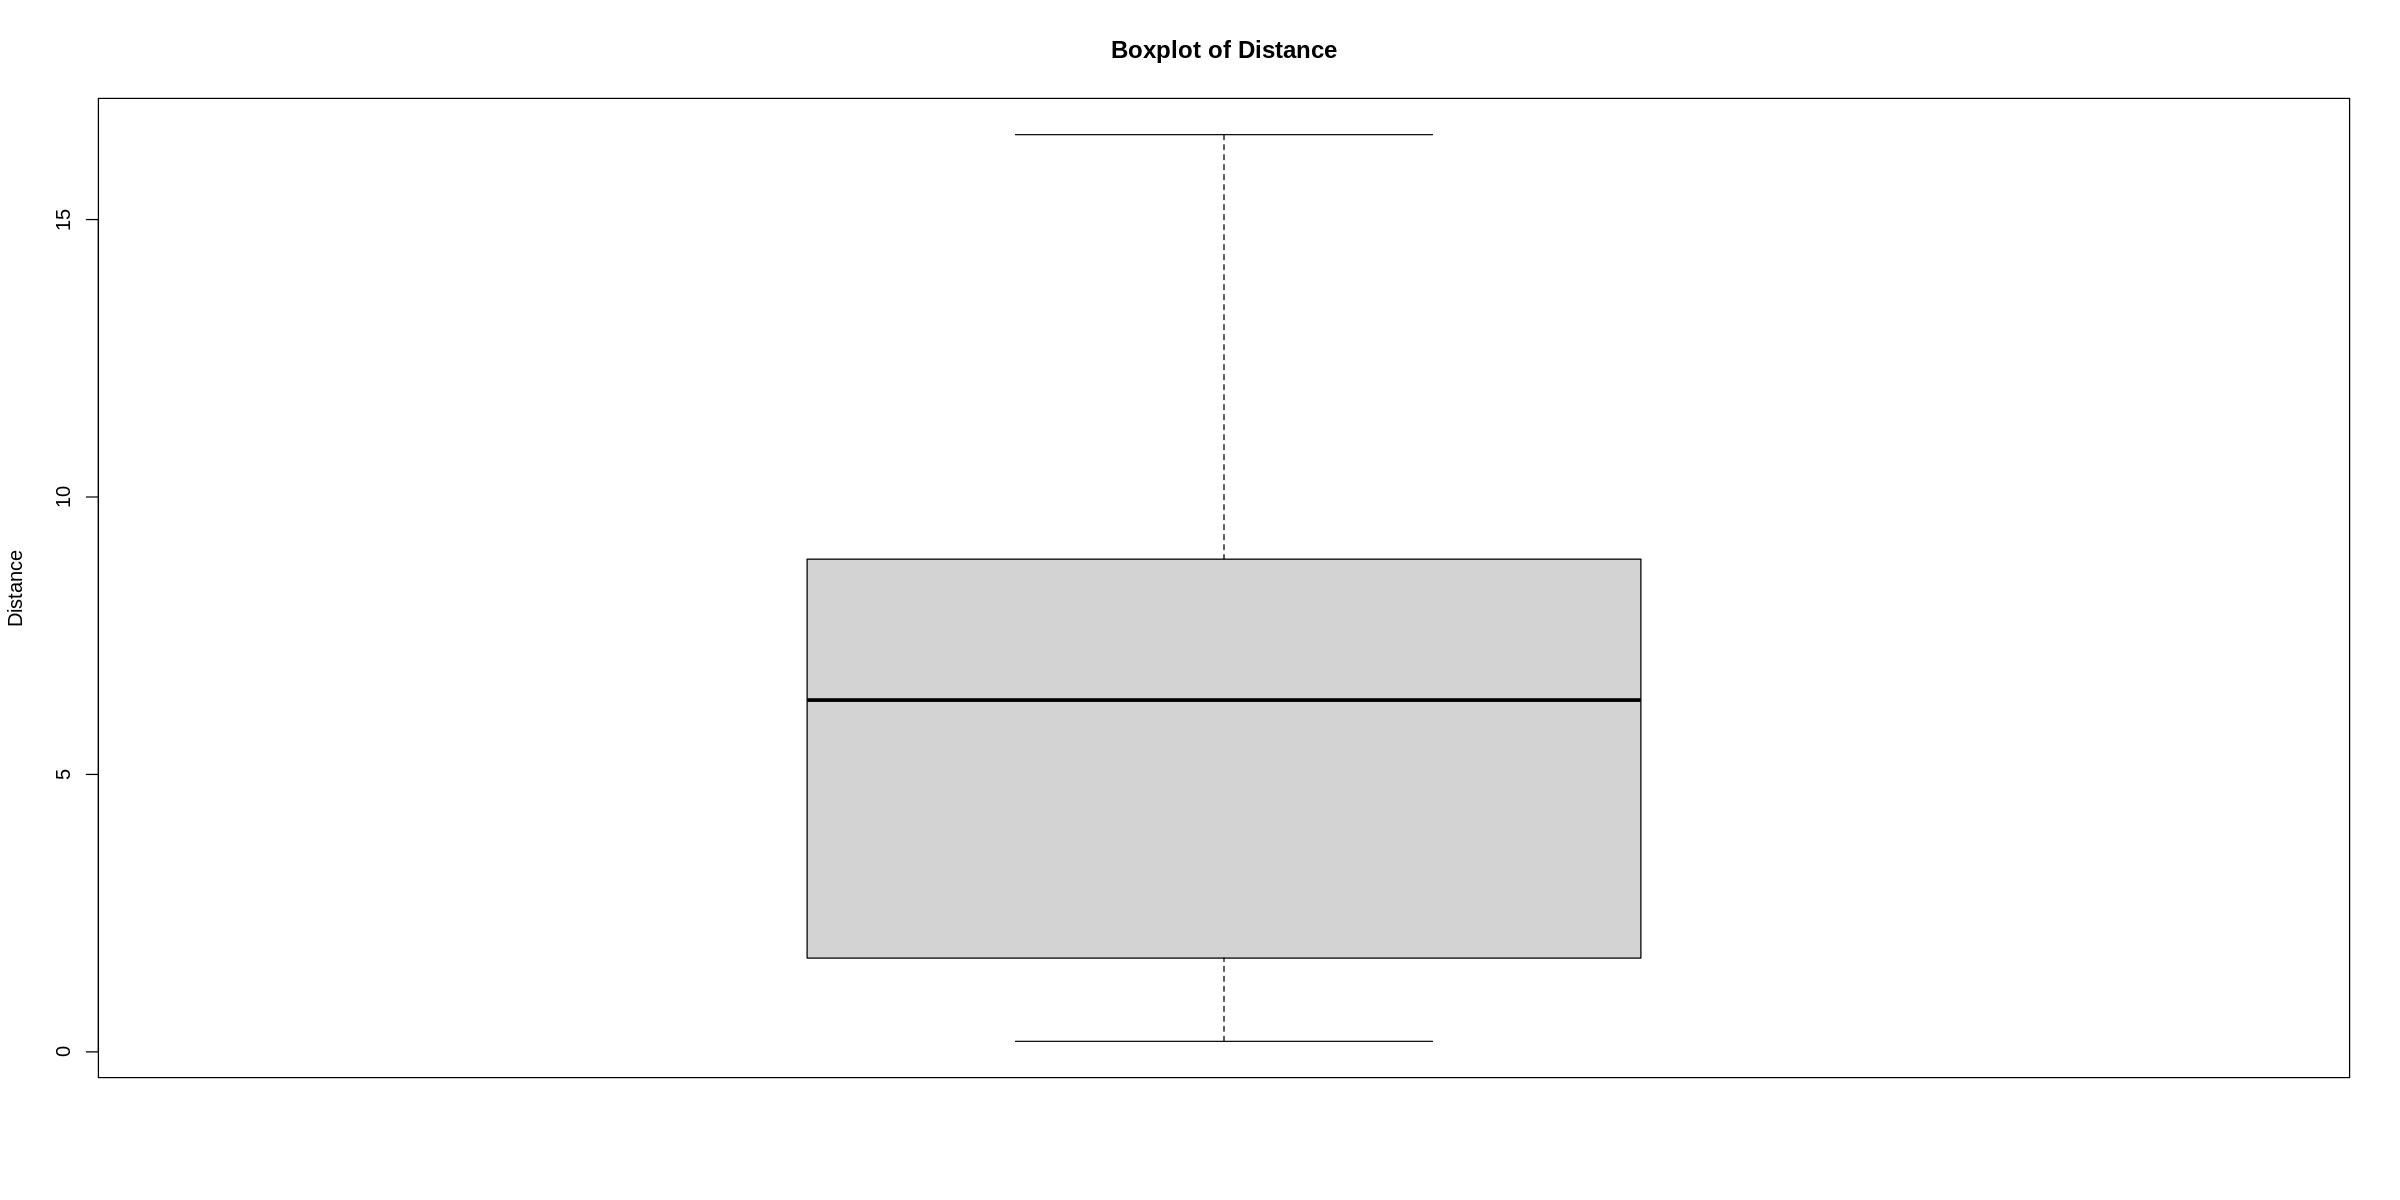

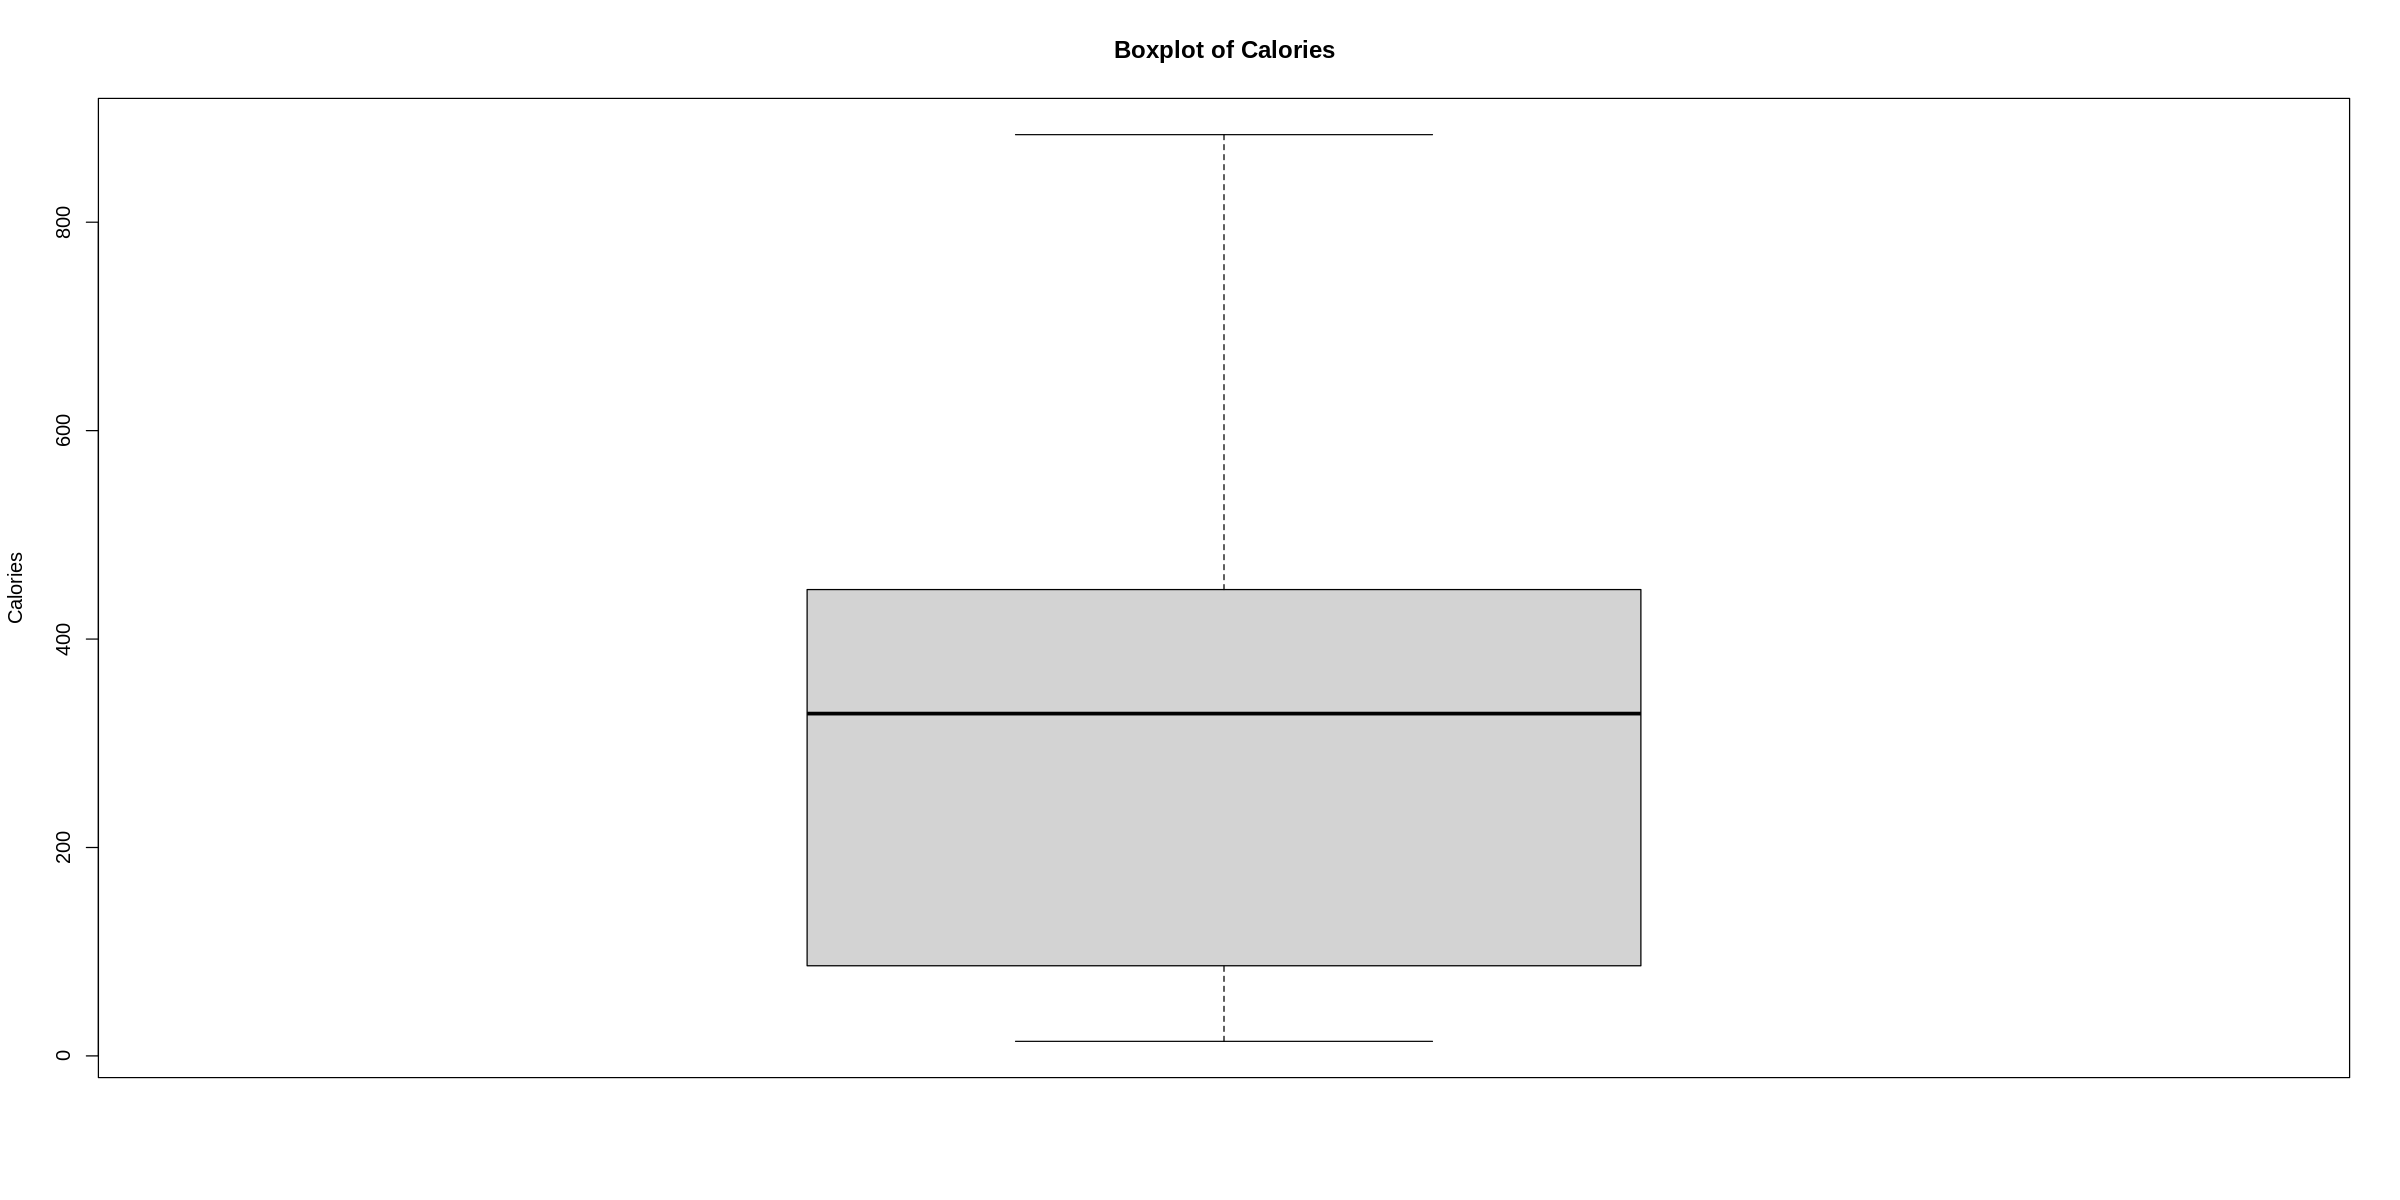

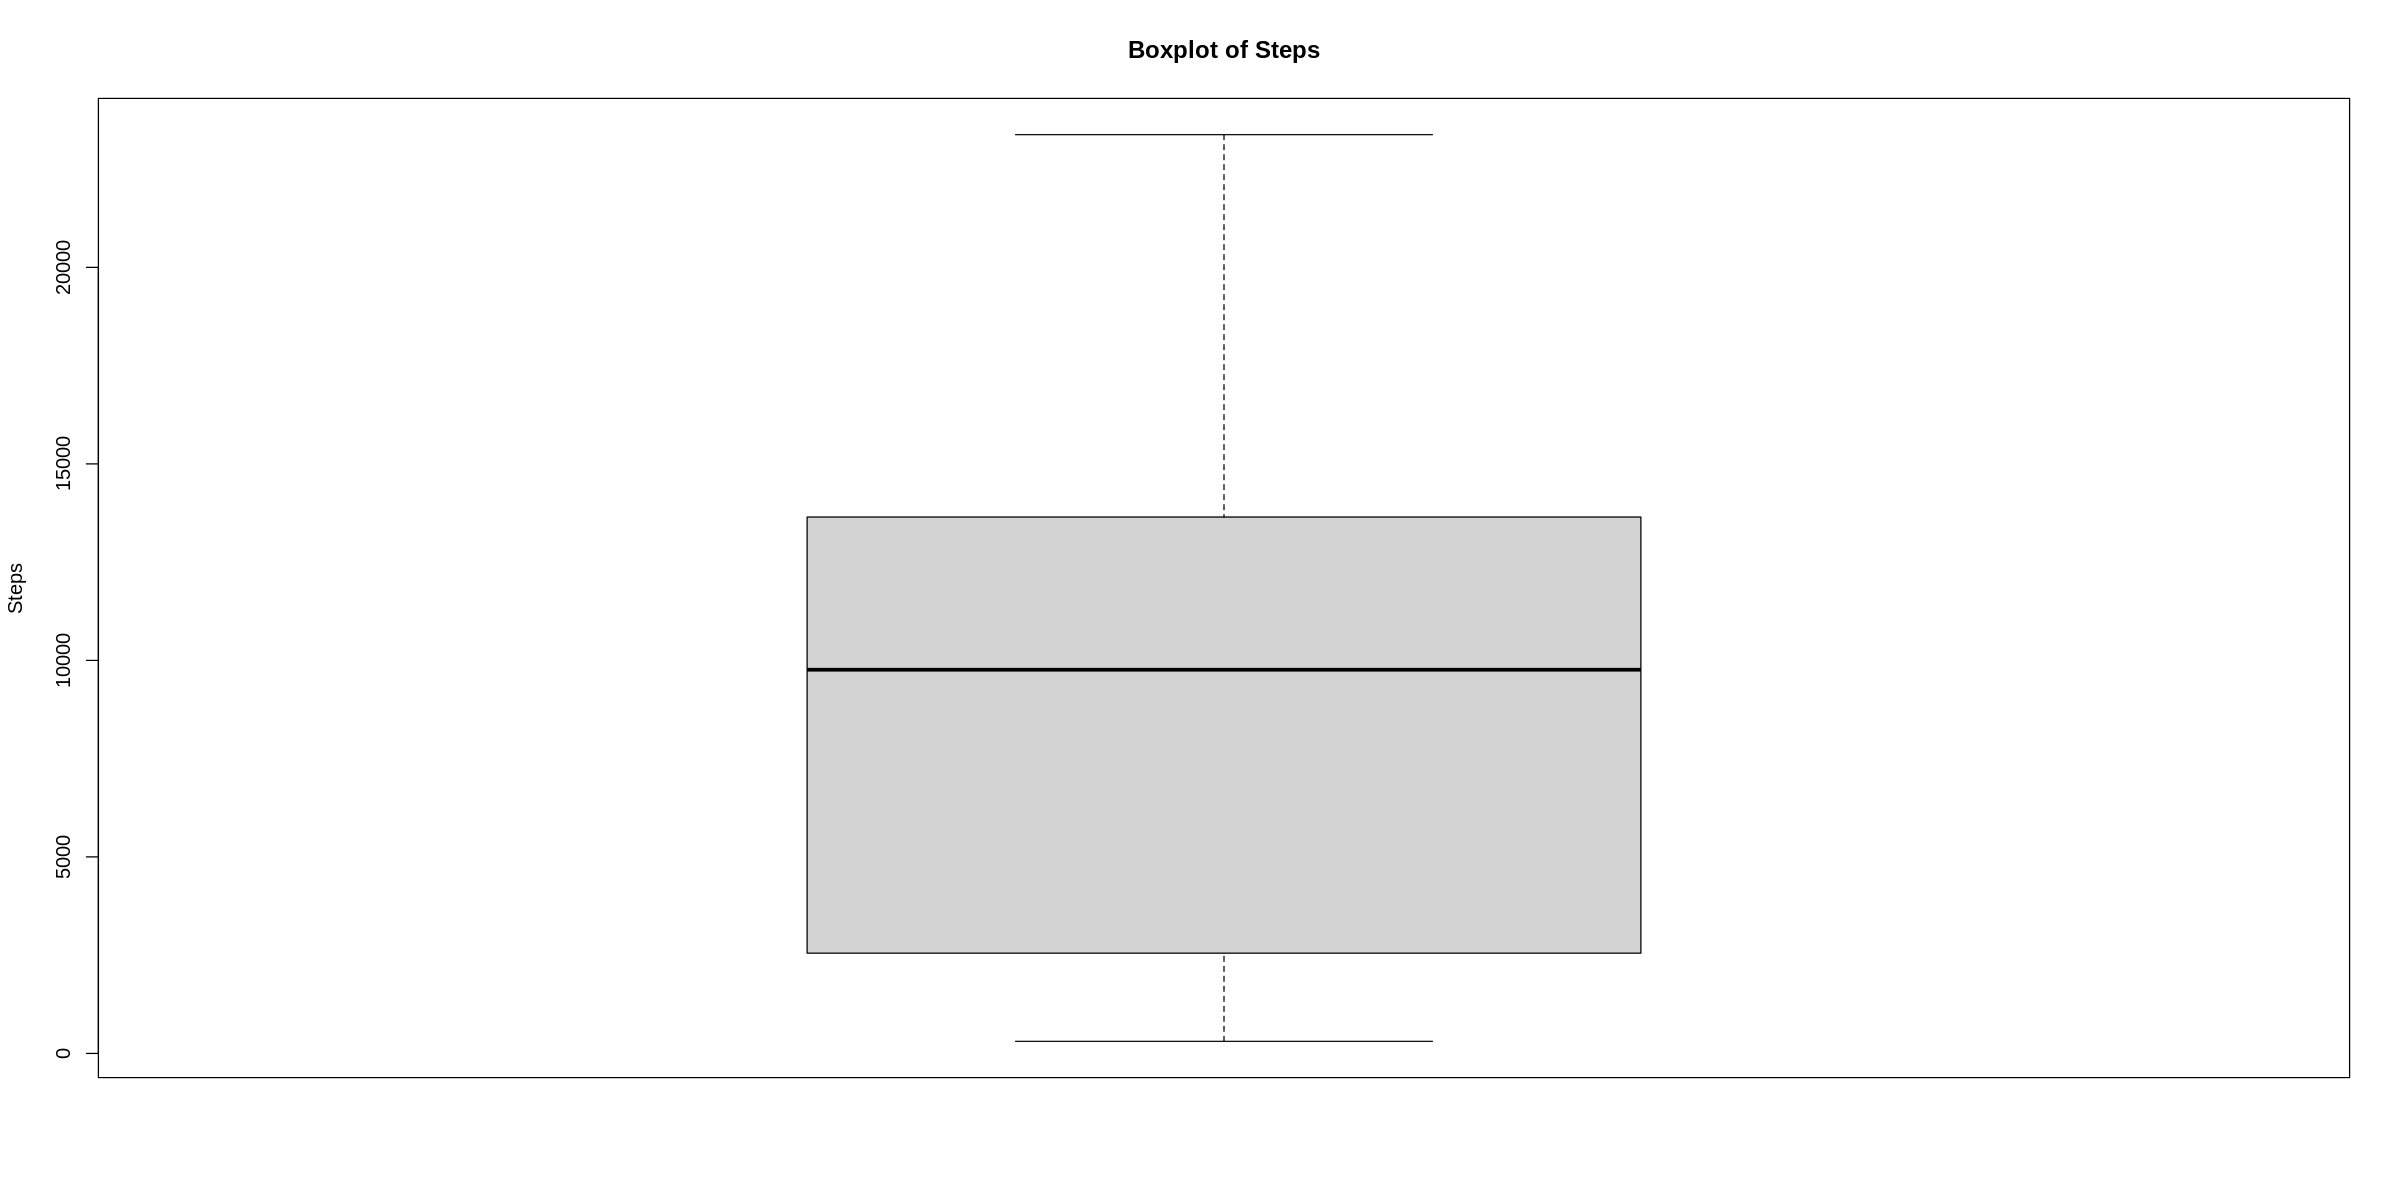

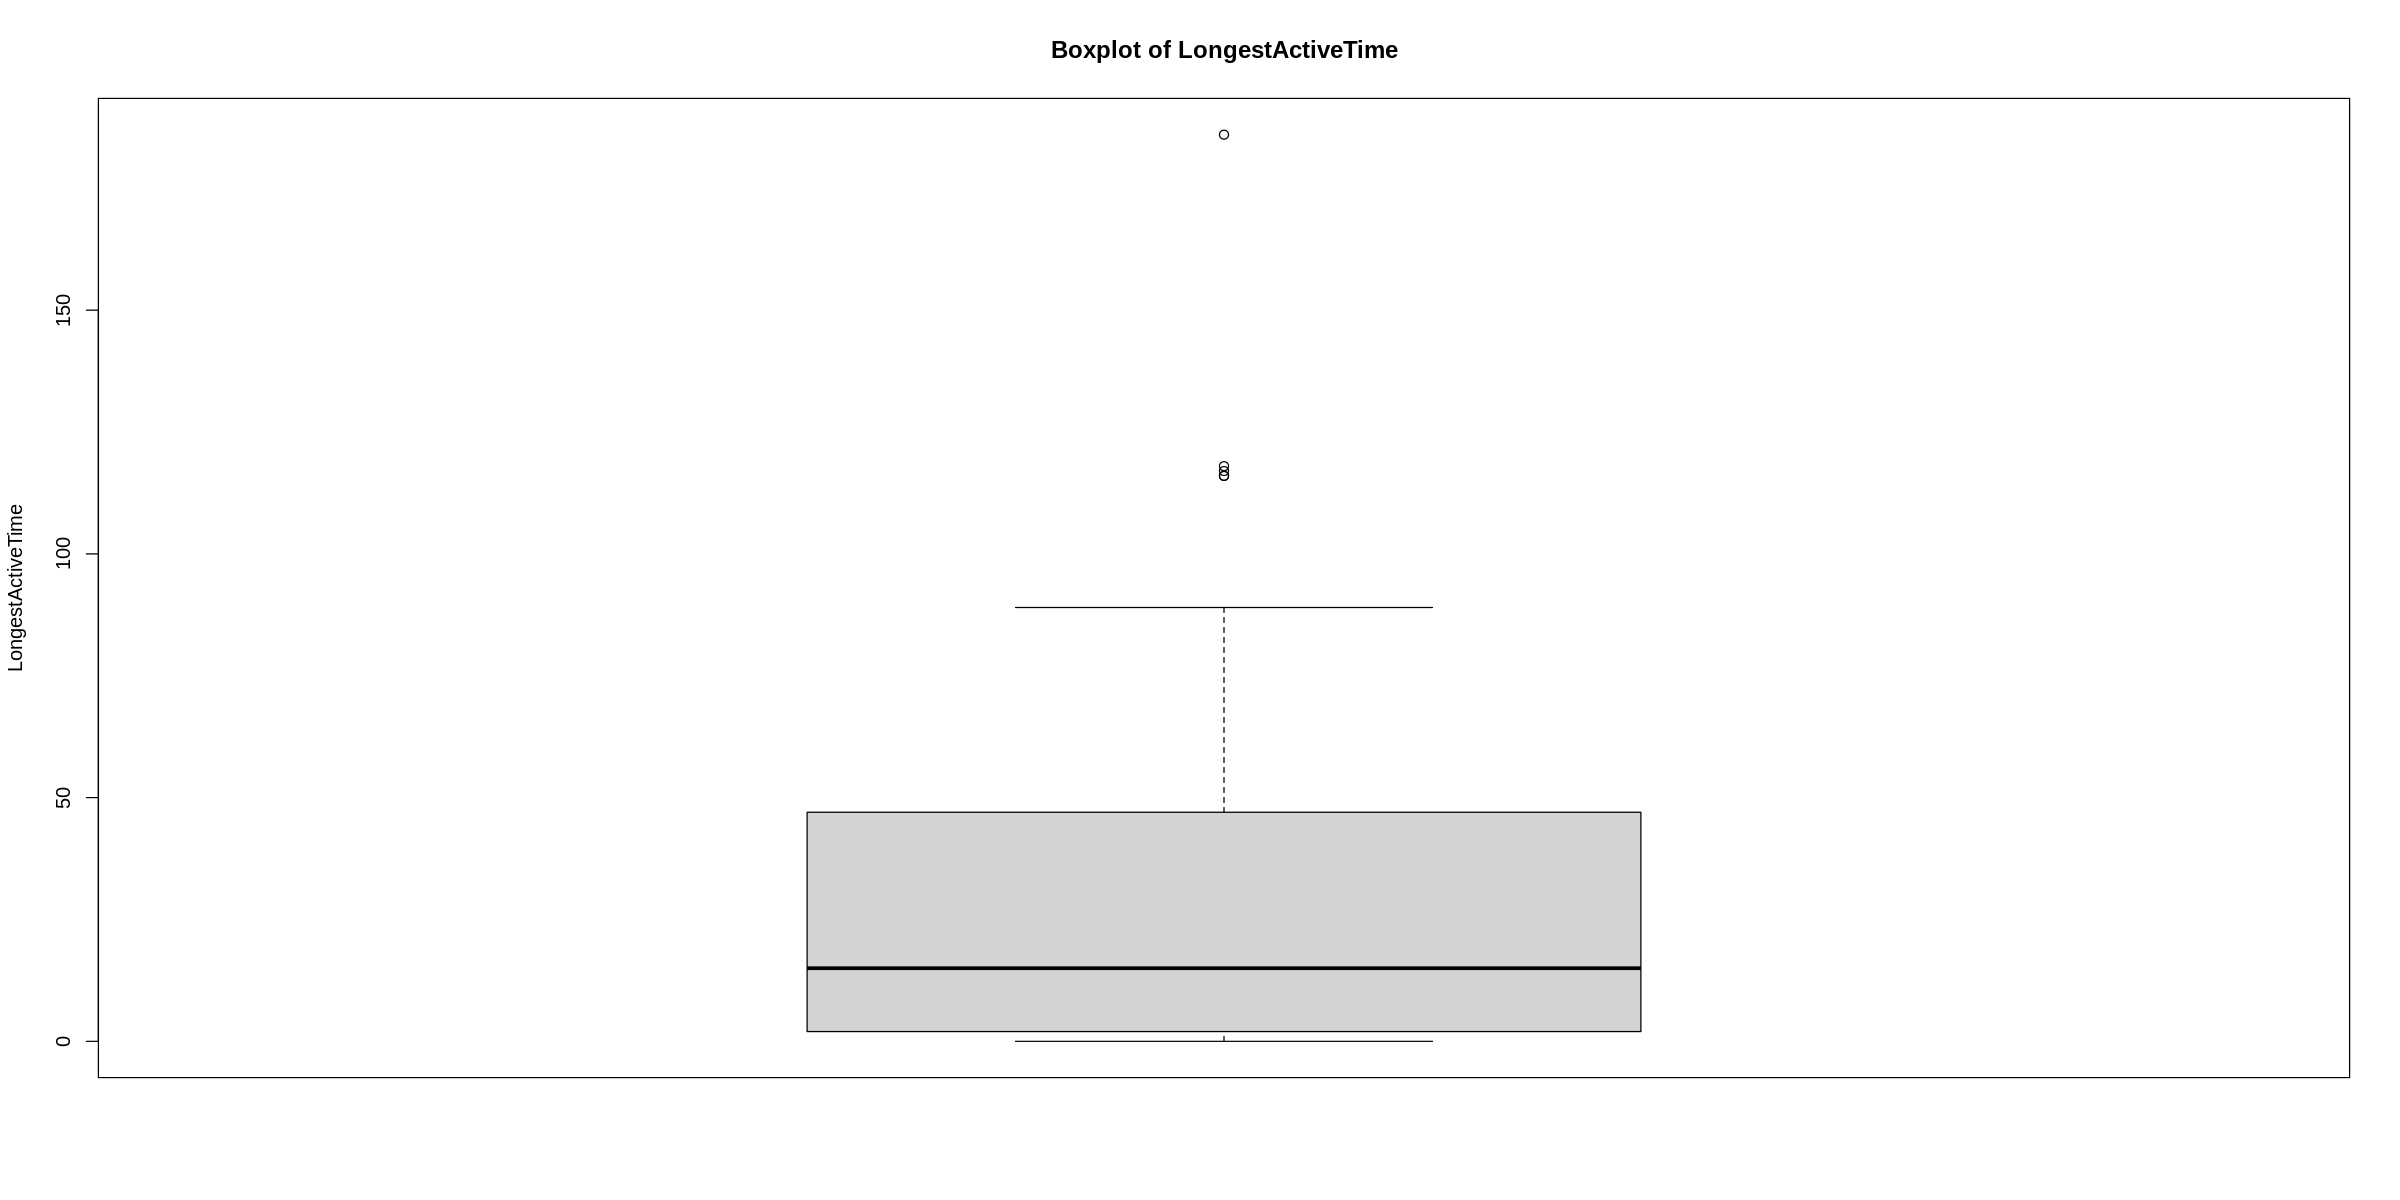

In [284]:
options(repr.plot.width = 20, repr.plot.height = 10)

boxplot(data[1:5], main = paste("Boxplot of Fitness Activity"))

for (i in 1: size){
  boxplot(sub_data[[sub_features[i]]], main = paste("Boxplot of", sub_features[i]),
            ylab = sub_features[i])
}

In this context, my activity is walking, and I am using the age range 40 - 59, and I am investigating if extremely high activity can lead to extremely high or
extremely low(unhealthy) resting heart rate as recommended by world health organisation. So this test is going to be a two-sided test. The null hypothesis is higher activity leads to better resting heart rates(61 <= bpm <= 77), while the alternative hypothesis is that much higher activity might lead to unhealthy resting heart rates(bpm < 61 & bpm > 77).

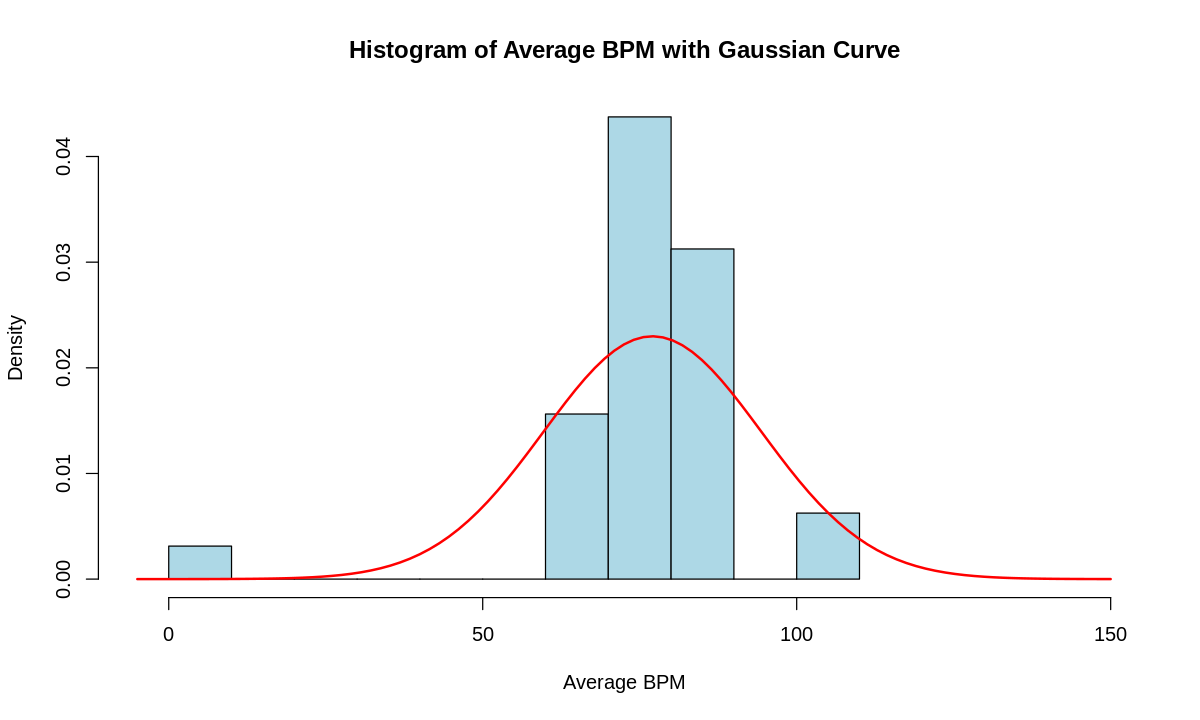

In [31]:
# Calculate mean and standard deviation
bpm <- data$AvgBpm
avg_bpm <- mean(bpm)
sd_bpm <- sd(bpm)

# Create the histogram
hist(bpm, freq = FALSE, breaks = 15, xlim = c(-5, 150),
     main = "Histogram of Average BPM with Gaussian Curve", # Title
     xlab = "Average BPM", ylab = "Density",  # Axis labels
     col = "lightblue", border = "black")  # Colors

# Overlay the Gaussian curve
curve(dnorm(x, mean = avg_bpm, sd = sd_bpm),
      col = "red", lwd = 2, add = TRUE)

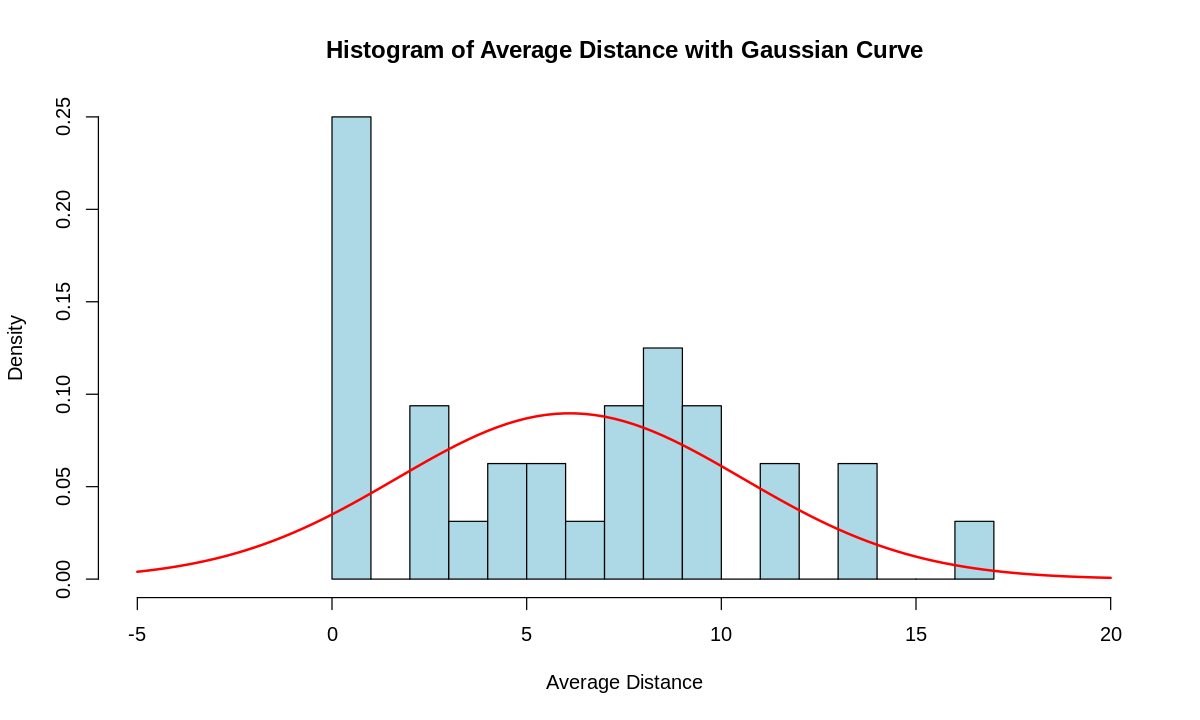

In [32]:
# Calculate mean and standard deviation
distance <- data$Distance
avg_distance <- mean(distance)
sd_distance <- sd(distance)

# Create the histogram
hist(distance, freq = FALSE, breaks = 15, xlim = c(-5, 20),
     main = "Histogram of Average Distance with Gaussian Curve", # Title
     xlab = "Average Distance", ylab = "Density",  # Axis labels
     col = "lightblue", border = "black")  # Colors

# Overlay the Gaussian curve
curve(dnorm(x, mean = avg_distance, sd = sd_distance),
      col = "red", lwd = 2, add = TRUE)


In [33]:
head(data)

Duration,Distance,Calories,Steps,AvgBpm,Fit
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
216,16.53,884,23376,110,NO
213,13.32,697,21593,110,NO
126,7.59,387,12599,85,NO
23,8.33,437,13374,89,NO
43,2.70,144,3992,73,YES
126,7.57,388,12545,77,YES


In [135]:
bpm <- sub_data["AvgBpm"] >= 61 & sub_data["AvgBpm"] <= 77
l = min(sub_data$Distance[bpm])
r = max(sub_data$Distance[bpm])
l
r
fit = sub_data$Distance>= l & sub_data$Distance <= r
fit_bpm = data$AvgBpm[fit]
unfit_bpm = data$AvgBpm[!fit]
unfit_bpm
fit_bpm
t.test(fit_bpm, unfit_bpm[1:(length(unfit_bpm)-1)])

[1] 0.56

[1] 8.63

[1] 110 110  78  83  80  82  86  89  79   0

[1] 85 89 73 77 76 74 67 75 66 74 67 65 67 84 81 81 75 77 82 76 80 77


	Welch Two Sample t-test

data:  fit_bpm and unfit_bpm[1:(length(unfit_bpm) - 1)]
t = -2.8715, df = 9.8125, p-value = 0.01693
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -22.646553  -2.828194
sample estimates:
mean of x mean of y 
 75.81818  88.55556 


In [140]:
#Steps
l = min(sub_data$Steps[bpm])
r = max(sub_data$Steps[bpm])
fit = sub_data$Steps>= l & sub_data$Steps <= r
fit_bpm = data$AvgBpm[fit]
unfit_bpm = data$AvgBpm[!fit]
unfit_bpm = unfit_bpm[1:(length(unfit_bpm)-1)]
unfit_bpm

t.test(unfit_bpm, fit_bpm)

[1] 110 110  85  89  78  83  80  82  86  89  79


	Welch Two Sample t-test

data:  unfit_bpm and fit_bpm
t = 3.7165, df = 12.841, p-value = 0.002639
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  5.672972 21.472483
sample estimates:
mean of x mean of y 
 88.27273  74.70000 


we can deduce from the p-value which is less than the critical value of 5%, that  it is statistically evident that we reject the null hypothesis, which states that been active leads to better resting heart rates. From this evidence, it is evident that way higher activity can lead to having a worse resting heart rating

In [139]:
#Steps
l = min(sub_data$Calories[bpm])
r = max(sub_data$Calories[bpm])
fit = sub_data$Calories>= l & sub_data$Calories <= r
fit_bpm = data$AvgBpm[fit]
unfit_bpm = data$AvgBpm[!fit]
unfit_bpm = unfit_bpm[1:(length(unfit_bpm)-1)]
unfit_bpm

t.test(unfit_bpm, fit_bpm)

[1] 110 110  78  83  80  82  86  89  79


	Welch Two Sample t-test

data:  unfit_bpm and fit_bpm
t = 2.8715, df = 9.8125, p-value = 0.01693
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  2.828194 22.646553
sample estimates:
mean of x mean of y 
 88.55556  75.81818 


Warning message in data$AvgBpm[!fit] - data$AvgBpm[fit]:
“longer object length is not a multiple of shorter object length”


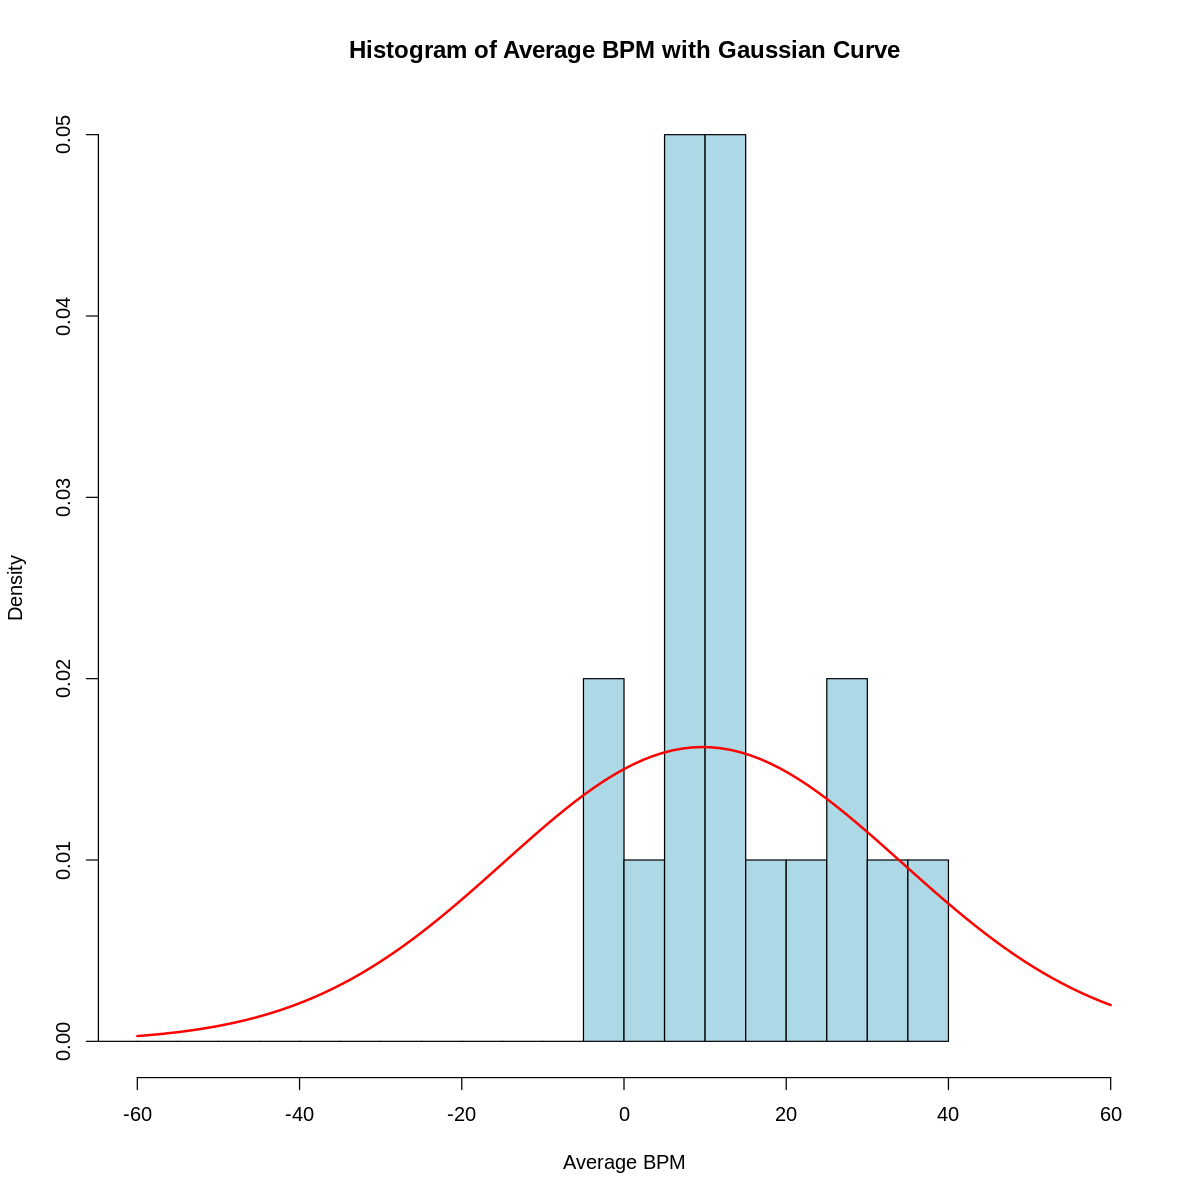

In [154]:
distance_diff = data$AvgBpm[!fit] - data$AvgBpm[fit]
avg_diff <- mean(distance_diff)
sd_diff <- sd(distance_diff)

hist(distance_diff, freq = FALSE, breaks = 30, xlim = c(-60, 60),
     main = "Histogram of Average BPM with Gaussian Curve", # Title
     xlab = "Average BPM", ylab = "Density",  # Axis labels
     col = "lightblue", border = "black")  # Colors
# Overlay the Gaussian curve
curve(dnorm(x, mean = avg_diff, sd = sd_diff),
      col = "red", lwd = 2, add = TRUE)

In [155]:
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



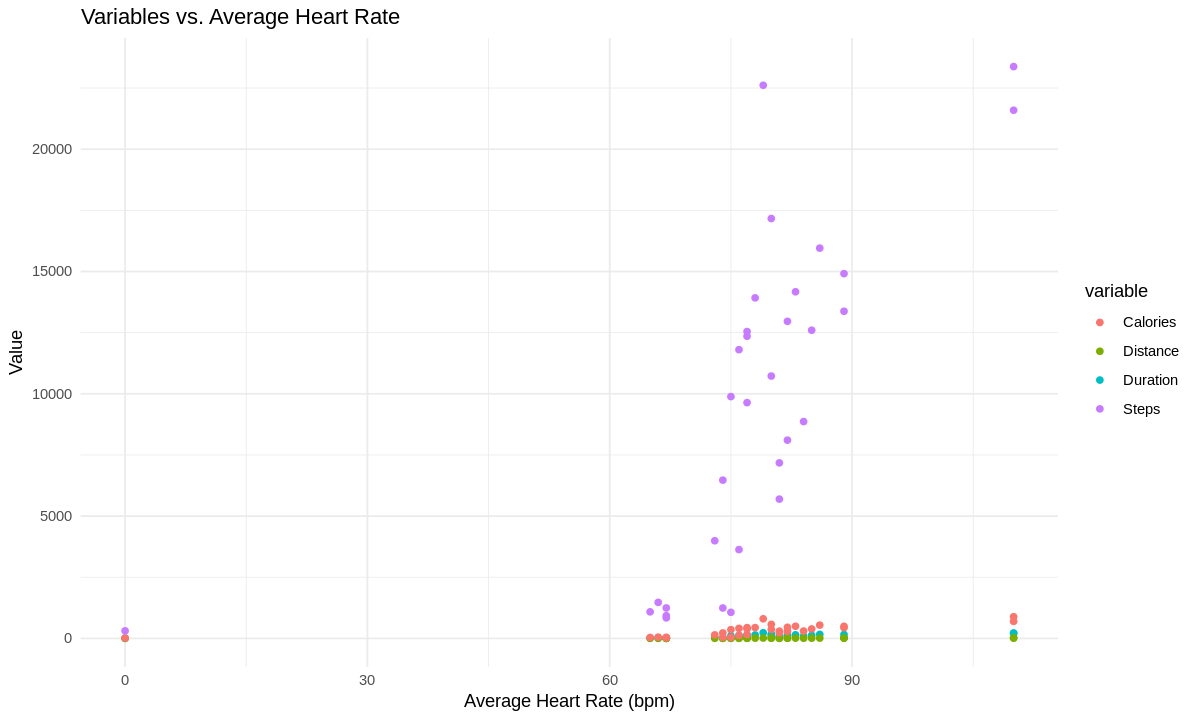

In [181]:
# # Create the plot
library(ggplot2)
library(tidyr)
library(gridExtra)
library(RColorBrewer)
options(repr.plot.width = 10, repr.plot.height = 6)

features <- gather(sub_data, key = "variable", value = "value", - AvgBpm)

ggplot(features, aes(x = AvgBpm, y = value, color = variable)) +
  geom_point() + theme_minimal() +
  labs(x = "Average Heart Rate (bpm)", y = "Value", title = "Variables vs. Average Heart Rate")



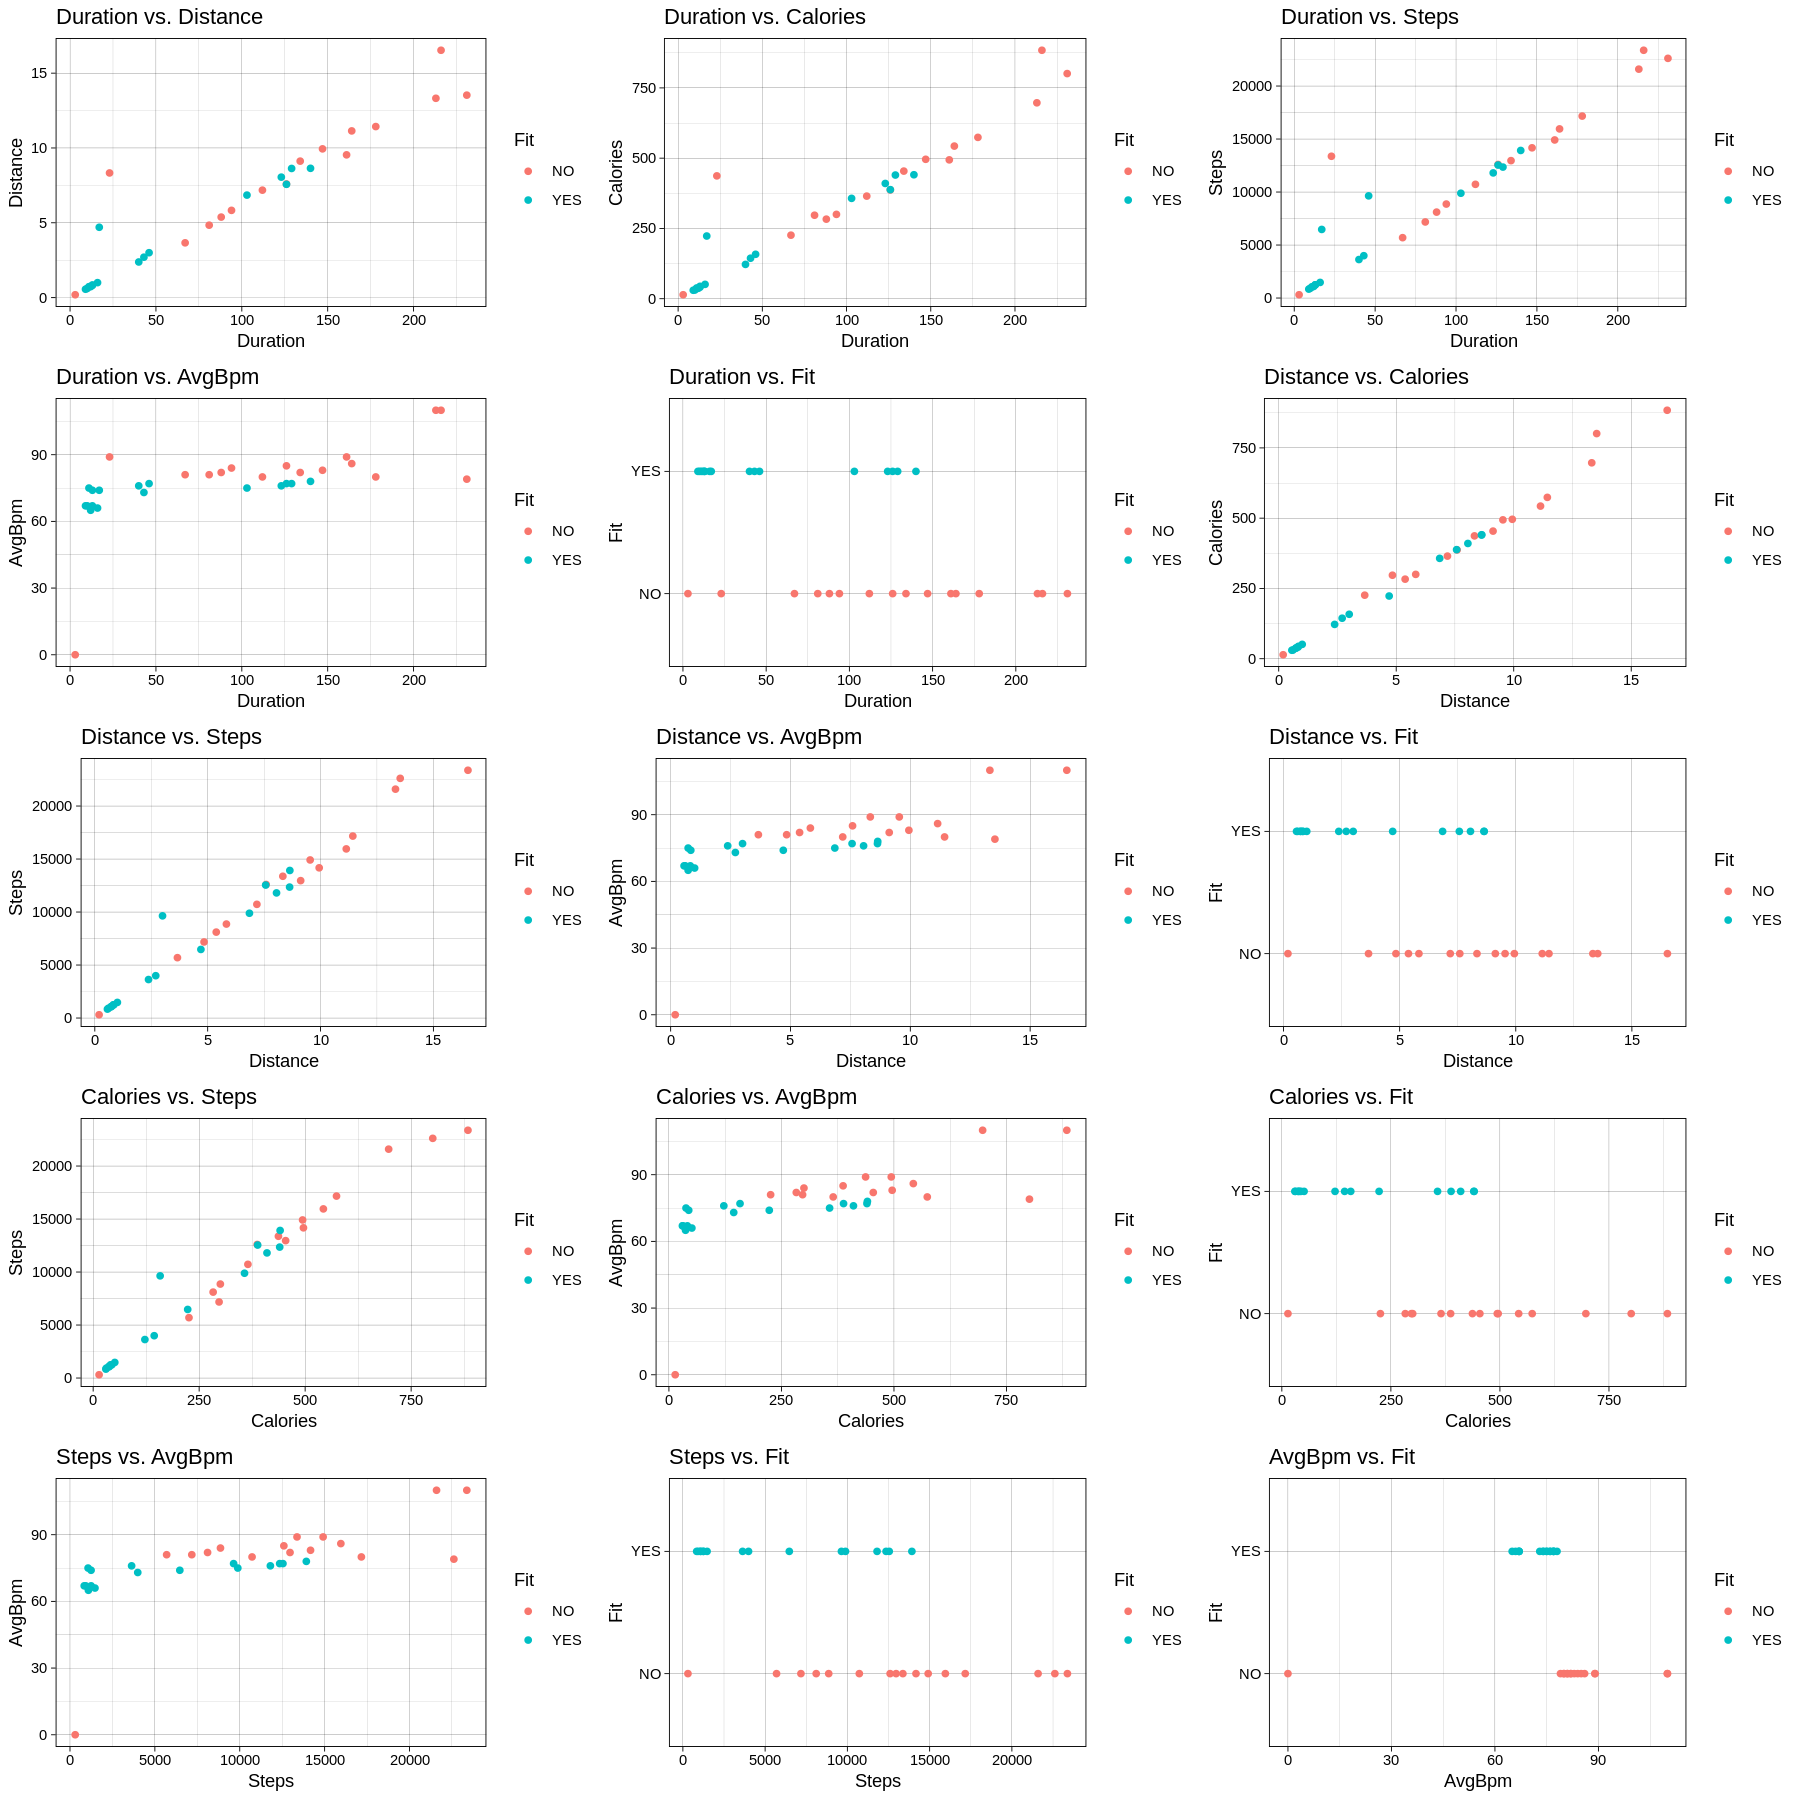

In [200]:

# # Create a long-format data frame
# data_long <- gather(sub_data, key = "variable", value = "value", -`Avg bpm`)

# Get the variable names
variables <- names(data)

color <- c(1, 2, 3, 4, 5, 6)

# Create a list to store the plots
plots <- list()

# Loop through each pair of variables
for (i in 1:(length(variables) - 1)) {
  for (j in (i + 1):length(variables)) {
    plot_name <- paste(variables[i], "vs.", variables[j])
    plots[[plot_name]] <- ggplot(data, aes_string(x = variables[i], y = variables[j], color = "Fit")) +
      geom_point() + theme_linedraw() + scale_color_discrete() +  # Use the "Set1" color palette

      labs(title = plot_name)
  # ggsave(paste0(plot_name, ".png"), plots[[plot_name]], width = 6, height = 4)

  }
}

# Display the plots
# do.call(gridExtra::grid.arrange, plots)
options(repr.plot.width = 15, repr.plot.height = 15)
grid.arrange(grobs = plots, nrow=5, ncol=3)
